<h2 style='color:purple' align='center'>Build our first neural network in Keras for image classification problem</h2>

**We will use keras fashion MNIST dataset. This consist of 60000 28X28 pixel images and 10000 test images, these images are classified in one of the 10 categories shown below**

<img src="slide1.png" />

**Each image is 28 x 28 pixel in dimension**

<img src='slide2.png' />

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

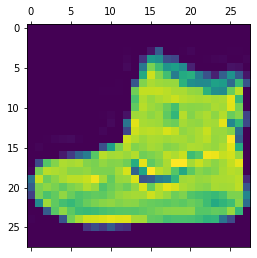

In [7]:
plt.matshow(X_train[0])

<h3 style='color:purple'>Normalize training data before training the neural network</h3>

In [8]:
X_train = X_train/255

In [9]:
X_test = X_test/255

<h3 style='color:purple'>Now build the Sequential Model and add layers into it</h3>

<img src='fashion_neural_net.png' />

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6413 - accuracy: 0.7793
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3897 - accuracy: 0.8591
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3430 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3241 - accuracy: 0.8811
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2989 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2886 - accuracy: 0.8942
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2759 - accuracy: 0.8986
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2661 - accuracy: 0.9008
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2612 - accuracy: 0.9018
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.247

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3531 - accuracy: 0.8767


[0.3531438410282135, 0.8766999840736389]

**Above shows accuracy score of 87.67%. The first parameter is loss**

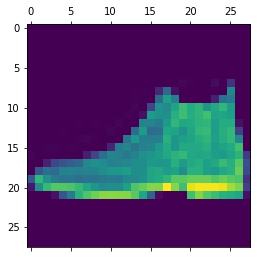

In [13]:
plt.matshow(X_test[0])

In [14]:
yp = model.predict(X_test)

In [15]:
np.argmax(yp[0])

9

In [16]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [17]:
class_labels[np.argmax(yp[0])]

'Ankle boot'